In [19]:
# 读取csv，比较两列关系，求相关系数
import pandas as pd
import numpy as np

# 读取csv文件
df = pd.read_csv('aligned&cleaned.csv')

# 计算相关系数
corr = df['change_ratio'].corr(df['net_inflow_rate'])

# 输出相关系数
print(corr)

0.5008260055799661


In [20]:
df.columns

Index(['Unnamed: 0', 'instrument', 'name', 'date', 'open', 'close', 'high',
       'low', 'volume', 'change_ratio', 'money_netflow', 'money_inflow',
       'money_outflow', 'net_inflow_rate'],
      dtype='object')

<Axes: >

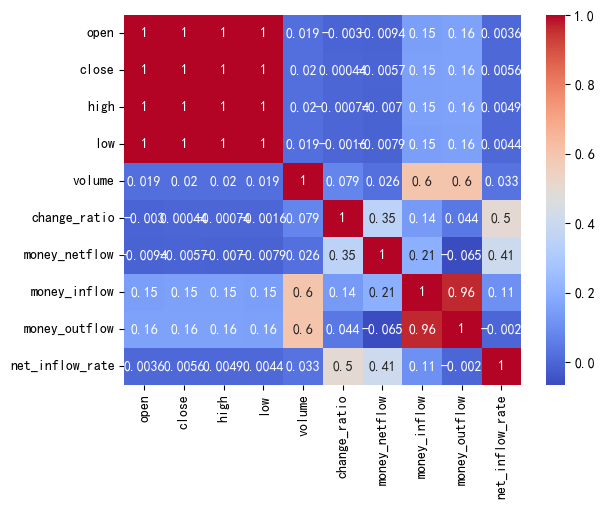

In [21]:
# df'change_ratio''net_inflow_rate'两列相关系数矩阵
corr_matrix = df[['open', 'close', 'high',
       'low', 'volume', 'change_ratio', 'money_netflow', 'money_inflow',
       'money_outflow', 'net_inflow_rate']].corr()

corr_matrix
# 画热力图
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [22]:
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['SimHei']  # 'SimHei' 是一种常见的中文字体
rcParams['axes.unicode_minus'] = False  # 正确显示负号


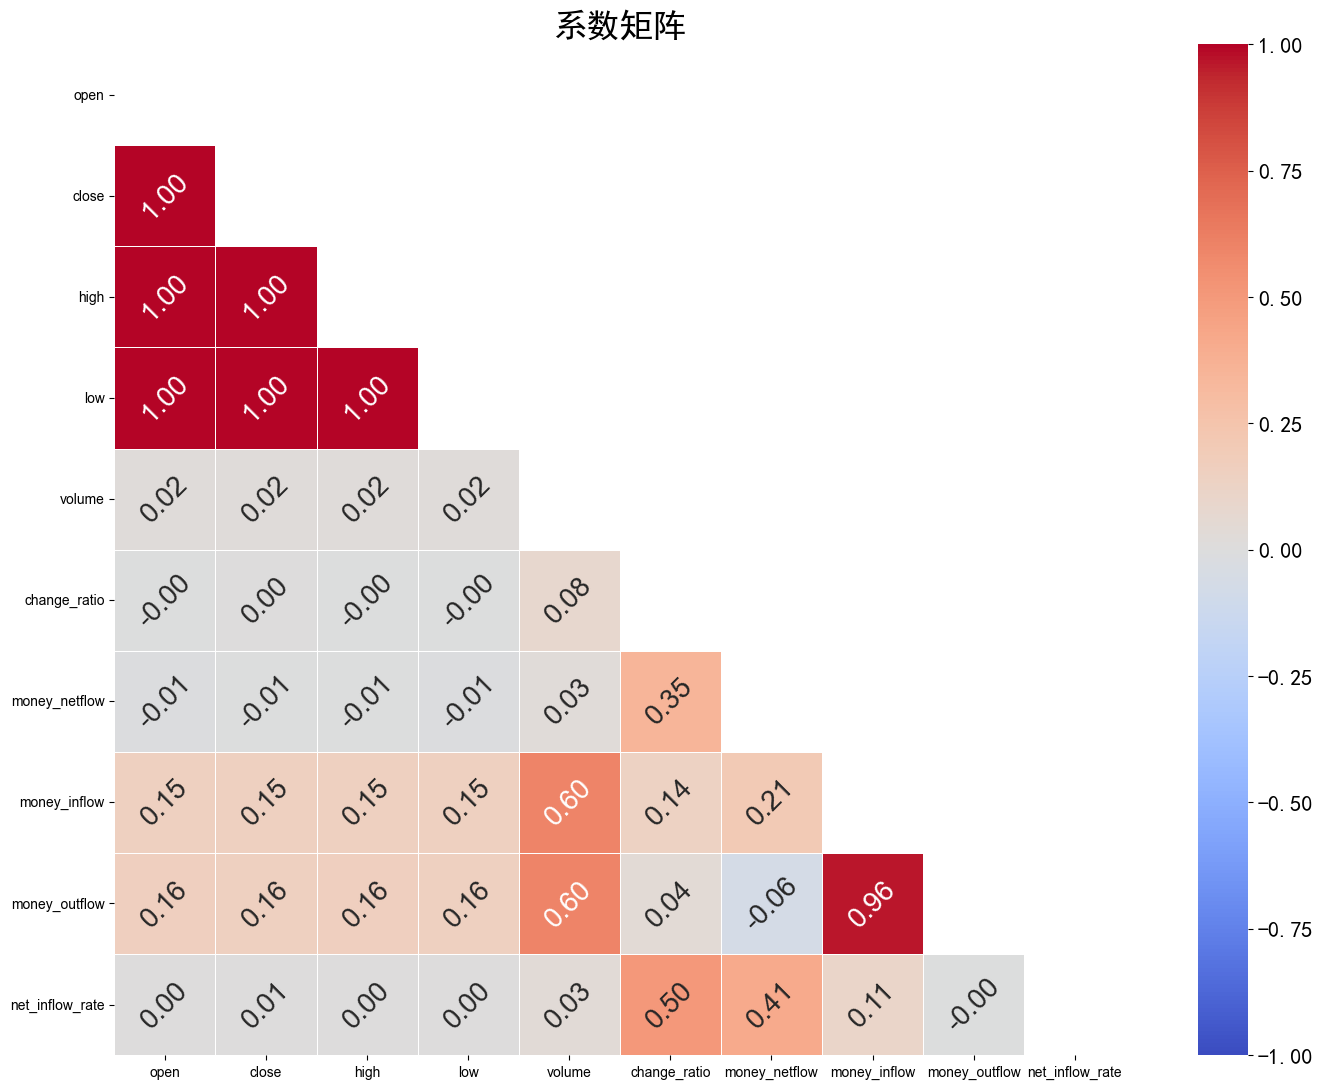

In [26]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
#mask=np.flip(mask,axis=0)
corr_matrix_mask = corr_matrix.mask(mask)
#np.fill_diagonal(corr_matrix_mask.values, np.nan)
plt.figure(figsize=(15, 11)) 
# 设置热力图的参数
ax=sns.heatmap(corr_matrix_mask, annot=True, cmap='coolwarm', fmt='.2f', 
            annot_kws={'size': 20, 'font':'Arial', 'rotation': 45}, 
            #cbar_kws={'label':"相关系数"},
            linewidths=0.5, square=True, 
            vmin=-1, vmax=1, center=0)
cax = plt.gcf().axes[-1] 
cax.tick_params(labelsize=16) # 设置colorbar的label文本和字体大小 
font1 = {'family':'SimHei','size':16, 'color':'#000000'} 
#热图以及colorbar的字体 
cbar = ax.collections[0].colorbar 
#cbar.set_label('相关系数',fontdict=font1)
plt.xticks(size=18, font='Arial',rotation=0)  # 设置x轴标签文字为水平方向
plt.yticks(size=18, font='Arial',rotation=0)  # 设置y轴标签文字为垂直方向

plt.title('系数矩阵',font='SimHei',size=24)  # 设置标题文字
plt.tight_layout()
plt.show()

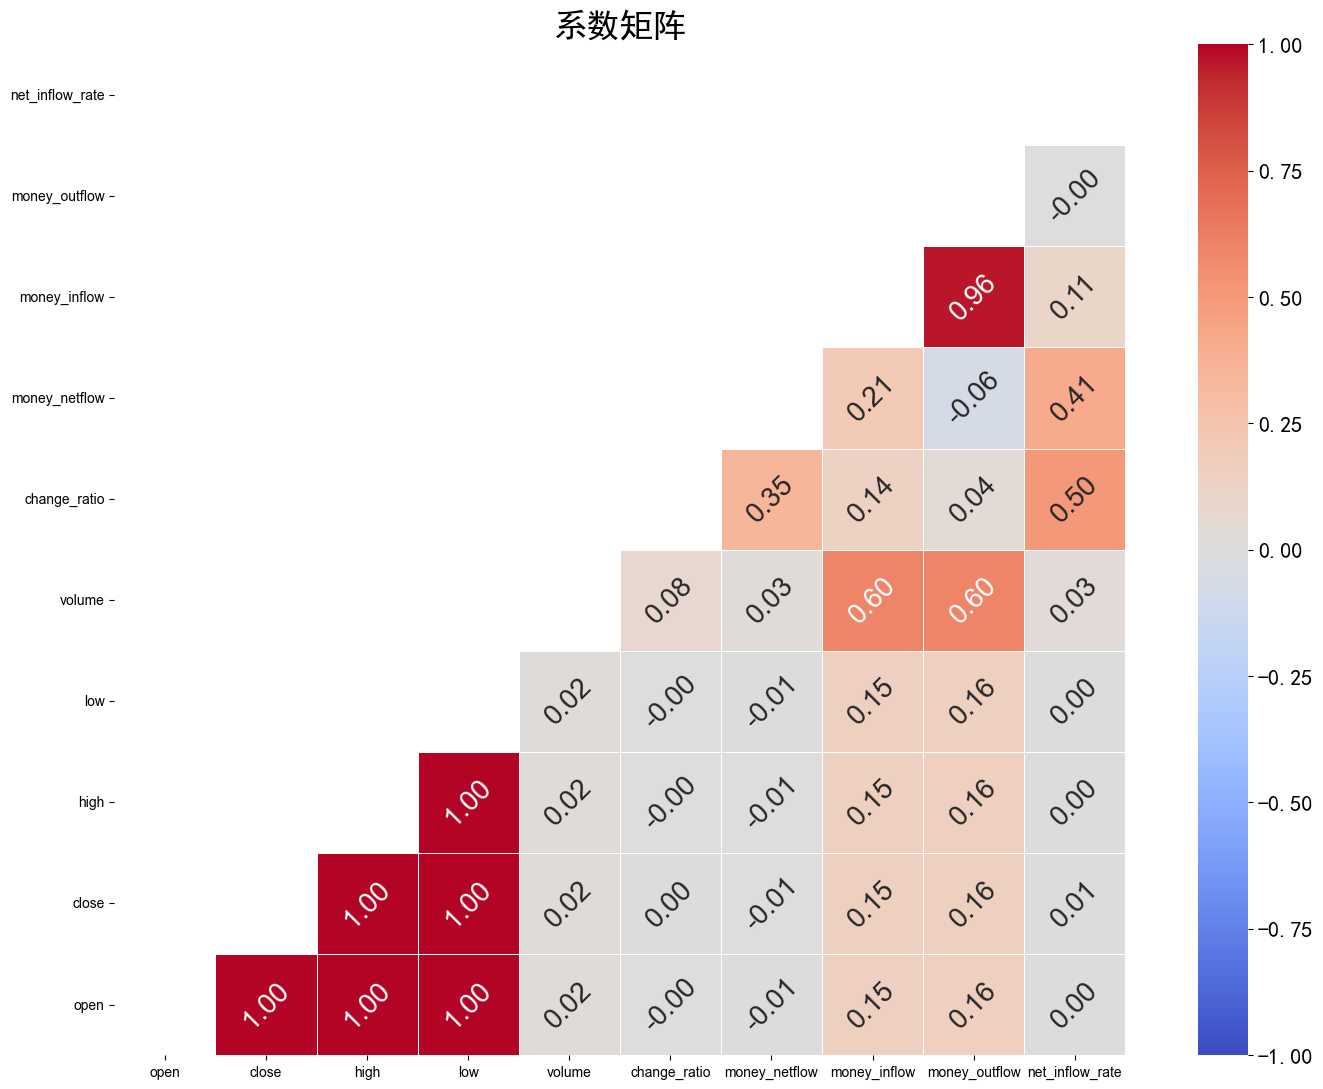

In [27]:
import matplotlib.pyplot as plt
corr=np.corrcoef(df[['open', 'close', 'high', 'low', 'volume', 'change_ratio', 'money_netflow', 'money_inflow', 'money_outflow', 'net_inflow_rate']].values.T)

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.tril_indices_from(mask)] = True
mask=np.flip(mask,axis=0)
corr=np.flip(corr,axis=0)
#corr_matrix_mask = corr.mask(mask)
#np.fill_diagonal(corr_matrix_mask.values, np.nan)

plt.figure(figsize=(15, 11)) 
# 设置热力图的参数
ax=sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', 
            annot_kws={'size': 20, 'font':'Arial', 'rotation': 45}, 
            #cbar_kws={'label':"相关系数"},
            linewidths=0.5, square=True, 
            vmin=-1, vmax=1, center=0,
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns[::-1])
cax = plt.gcf().axes[-1] 
cax.tick_params(labelsize=16) # 设置colorbar的label文本和字体大小 
font1 = {'family':'SimHei','size':16, 'color':'#000000'} 
#热图以及colorbar的字体 
cbar = ax.collections[0].colorbar 
#cbar.set_label('相关系数',fontdict=font1)
plt.xticks(size=18, font='Arial',rotation=0)  # 设置x轴标签文字为水平方向
plt.yticks(size=18, font='Arial',rotation=0)  # 设置y轴标签文字为垂直方向

plt.title('系数矩阵',font='SimHei',size=24)  # 设置标题文字
plt.tight_layout()
plt.show()